In [1]:
import pandas as pd
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import cm
from scipy import stats
from scipy.stats import pearsonr
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.ticker import FormatStrFormatter

plt.rcParams.update({'font.family':'arial'})

%matplotlib inline

# ABE9

In [2]:
df_c = pd.read_csv('Data/cumulative/BE4max_ABE9_A115.csv')
df_c = df_c / 100

df_c_sem = pd.read_csv('Data/cumulative/BE4max_ABE9_A115_sem.csv')
df_c_sem = df_c_sem / 100

In [3]:
# allele: GAAGACCAAGGATAGACTGC
df_allele1 = df_c[['C6','C7']]
df_allele1['probability'] = df_allele1['C6'] * df_allele1['C7']
df_allele1.to_csv('Data/calc_freq/BE4max_ABE9_C6_C7.csv',index=False)

df_allele1_err = df_c_sem[['C6','C7']]
df_allele1_err['probability'] = np.sqrt(np.square(df_allele1_err['C6']/df_allele1['C6']) +
                                        np.square(df_allele1_err['C7']/df_allele1['C7'])) * df_allele1['probability']
df_allele1_err.to_csv('Data/calc_freq/BE4max_ABE9_C6_C7_err.csv',index=False)

/var/folders/zt/rj0vk4w576n5lb6vjzgpk8nc0000gn/T/ipykernel_15643/3016283527.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele1['probability'] = df_allele1['C6'] * df_allele1['C7']
/var/folders/zt/rj0vk4w576n5lb6vjzgpk8nc0000gn/T/ipykernel_15643/3016283527.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele1_err['probability'] = np.sqrt(np.square(df_allele1_err['C6']/df_allele1['C6']) +


In [4]:
# allele frequencies
df_a = pd.read_csv('Data/allele_merged/20211109_BE4max_ABE9_A115.csv',
                   usecols=['target','24h_mean','12h_mean','8h_mean','4h_mean',
                            '2h_mean','1h_mean','0h_mean'])

df_a = df_a.set_index('target')
df_a = df_a.fillna(0)
df_a = df_a[df_a.columns[::-1]]
df_a = df_a / 100

df_a.head()

,0h_mean,1h_mean,2h_mean,4h_mean,8h_mean,12h_mean,24h_mean
target,,,,,,,
GAAGACCAAGGATAGACTGC,0.934644,0.946018,0.939992,0.938763,0.936541,0.929572,0.926119
GAAGATTAAGGATAGACTGC,0.000000,0.000000,0.000000,0.002869,0.006461,0.009808,0.016832
GGAGACCAAGGATAGACTGC,0.004123,0.003068,0.003178,0.003347,0.003236,0.003354,0.002907
GAGGACCAAGGATAGACTGC,0.003694,0.002859,0.003206,0.003193,0.003176,0.003268,0.002840
GAAGACCAAGGATAGGCTGC,0.002901,0.002356,0.002812,0.002494,0.002425,0.002511,0.002419


In [5]:
# allele frequency errors
df_a_err = pd.read_csv('Data/allele_merged/20211109_BE4max_ABE9_A115.csv',
                       usecols=['target','24h_SEM','12h_SEM','8h_SEM','4h_SEM',
                                '2h_SEM','1h_SEM','0h_SEM'])

df_a_err = df_a_err.set_index('target')
df_a_err = df_a_err.fillna(0)
df_a_err = df_a_err[df_a_err.columns[::-1]]
df_a_err = df_a_err / 100

df_a_err.head()

,0h_SEM,1h_SEM,2h_SEM,4h_SEM,8h_SEM,12h_SEM,24h_SEM
target,,,,,,,
GAAGACCAAGGATAGACTGC,0.002095,0.000354,0.001955,0.001353,0.001062,0.003089,0.002712
GAAGATTAAGGATAGACTGC,0.000000,0.000000,0.000000,0.000278,0.000269,0.000394,0.000762
GGAGACCAAGGATAGACTGC,0.000482,0.000041,0.000091,0.000026,0.000103,0.000167,0.000151
GAGGACCAAGGATAGACTGC,0.000094,0.000122,0.000250,0.000075,0.000102,0.000219,0.000127
GAAGACCAAGGATAGGCTGC,0.000272,0.000058,0.000239,0.000114,0.000149,0.000152,0.000098


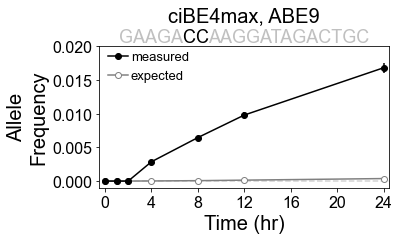

In [6]:
fig,ax = plt.subplots(figsize=(5.2,2.6))

time = [0,1,2,4,8,12,24]

ax.axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

ax.errorbar(time,df_allele1['probability'],yerr=df_allele1_err['probability'],
            fmt='-o',mfc='white',color='grey',label='calculated')
ax.errorbar(time,df_a.loc['GAAGATTAAGGATAGACTGC'],yerr=df_a_err.loc['GAAGATTAAGGATAGACTGC'],
            marker='o',color='black',label='measured')

ax.set_xlim([-0.5,24.5])
ax.set_xticks([0,4,8,12,16,20,24])
ax.tick_params(axis="x", labelsize=16)
ax.set_xlabel('Time (hr)', fontsize=20)

ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.set_ylim([-0.001,0.02])
ax.set_yticks([0,0.005,0.01,0.015,0.02])
ax.tick_params(axis="y", labelsize=16)
ax.set_ylabel('Allele\nFrequency',fontsize=20)

legend_elements = [Line2D([0],[0],marker='o',color='black',label='measured',
                          markerfacecolor='black',markersize=6,linestyle='-'),
                   Line2D([0],[0],marker='o',color='grey',label='expected',
                          markerfacecolor='white',markersize=6,linestyle='-')]
ax.legend(handles=legend_elements,bbox_to_anchor=(0.35,1.05),
          fontsize=13,frameon=False,handlelength=1.6,handletextpad=0.2)

ax.text(4, 0.02, 'GAAGA', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(7.2, 0.02, 'C', ha='center', va='bottom',color='black',fontsize=18)
ax.text(8.3, 0.02, 'C', ha='center', va='bottom',color='black',fontsize=18)
ax.text(15.8, 0.02, 'AAGGATAGACTGC', ha='center', va='bottom',color='silver',fontsize=18)

ax.set_title('ciBE4max, ABE9',fontsize=20,pad=25)

plt.savefig('ExportedPlots/BE4max_ABE9_allele1_20220405.svg',dpi=300,bbox_inches='tight')

# EMX1

In [7]:
df_c = pd.read_csv('Data/cumulative/BE4max_EMX1_A115.csv')
df_c = df_c / 100

df_c_sem = pd.read_csv('Data/cumulative/BE4max_EMX1_A115_sem.csv')
df_c_sem = df_c_sem / 100

In [8]:
# allele: GAGTCCGAGCAGAAGAAGAA
df_allele1 = df_c[['C5','C6']]
df_allele1['probability'] = df_allele1['C5'] * df_allele1['C6']
df_allele1.to_csv('Data/calc_freq/BE4max_EMX1_C5_C6.csv',index=False)

df_allele1_err = df_c_sem[['C5','C6']]
df_allele1_err['probability'] = np.sqrt(np.square(df_allele1_err['C5']/df_allele1['C5']) +
                                        np.square(df_allele1_err['C6']/df_allele1['C6'])) * df_allele1['probability']
df_allele1_err.to_csv('Data/calc_freq/BE4max_EMX1_C5_C6_err.csv',index=False)

In [9]:
df_a = pd.read_csv('Data/allele_merged/20211109_BE4max_EMX1_A115.csv',
                   usecols=['target','24h_mean','12h_mean','8h_mean','4h_mean',
                            '2h_mean','1h_mean','0h_mean'])

df_a = df_a.set_index('target')
df_a = df_a.fillna(0)
df_a = df_a[df_a.columns[::-1]]
df_a = df_a / 100

df_a.head()

,0h_mean,1h_mean,2h_mean,4h_mean,8h_mean,12h_mean,24h_mean
target,,,,,,,
GAGTCCGAGCAGAAGAAGAA,0.945112,0.942251,0.940993,0.928919,0.901464,0.881846,0.841264
GAGTTTGAGCAGAAGAAGAA,0.000000,0.000000,0.000000,0.007767,0.024928,0.045019,0.078239
GAGTTCGAGCAGAAGAAGAA,0.000000,0.001194,0.002611,0.005192,0.007629,0.010102,0.014626
GAGTCTGAGCAGAAGAAGAA,0.001171,0.001117,0.001152,0.001246,0.001912,0.001939,0.002704
GAGTCCGAGCAGAAGAAGAG,0.002472,0.002622,0.002495,0.002689,0.002893,0.002584,0.002438


In [10]:
df_a_err = pd.read_csv('Data/allele_merged/20211109_BE4max_EMX1_A115.csv',
                       usecols=['target','24h_SEM','12h_SEM','8h_SEM','4h_SEM',
                                '2h_SEM','1h_SEM','0h_SEM'])

df_a_err = df_a_err.set_index('target')
df_a_err = df_a_err.fillna(0)
df_a_err = df_a_err[df_a_err.columns[::-1]]
df_a_err = df_a_err / 100

df_a_err.head()

,0h_SEM,1h_SEM,2h_SEM,4h_SEM,8h_SEM,12h_SEM,24h_SEM
target,,,,,,,
GAGTCCGAGCAGAAGAAGAA,0.001450,0.001291,0.001253,0.000310,0.002286,0.001846,0.004501
GAGTTTGAGCAGAAGAAGAA,0.000000,0.000000,0.000000,0.000226,0.001062,0.002192,0.003053
GAGTTCGAGCAGAAGAAGAA,0.000000,0.000067,0.000033,0.000589,0.000445,0.000129,0.000412
GAGTCTGAGCAGAAGAAGAA,0.000108,0.000053,0.000114,0.000063,0.000076,0.000206,0.000099
GAGTCCGAGCAGAAGAAGAG,0.000151,0.000063,0.000067,0.000091,0.000122,0.000133,0.000055


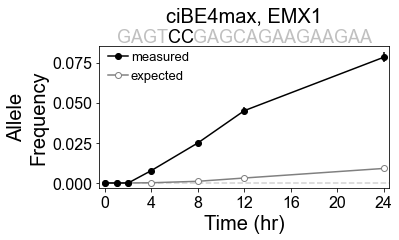

In [11]:
fig,ax = plt.subplots(figsize=(5.2,2.6))

time = [0,1,2,4,8,12,24]

ax.axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

ax.errorbar(time,df_allele1['probability'],yerr=df_allele1_err['probability'],
            fmt='-o',mfc='white',color='grey',label='calculated')
ax.errorbar(time,df_a.loc['GAGTTTGAGCAGAAGAAGAA'],yerr=df_a_err.loc['GAGTTTGAGCAGAAGAAGAA'],
            marker='o',color='black',label='measured')

ax.set_xlim([-0.5,24.5])
ax.set_xticks([0,4,8,12,16,20,24])
ax.tick_params(axis="x", labelsize=16)
ax.set_xlabel('Time (hr)', fontsize=20)

ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.set_ylim([-0.003,0.085])
#ax.set_yticks([0,0.005,0.01,0.015,0.02])
ax.tick_params(axis="y", labelsize=16)
ax.set_ylabel('Allele\nFrequency',fontsize=20)

legend_elements = [Line2D([0],[0],marker='o',color='black',label='measured',
                          markerfacecolor='black',markersize=6,linestyle='-'),
                   Line2D([0],[0],marker='o',color='grey',label='expected',
                          markerfacecolor='white',markersize=6,linestyle='-')]
ax.legend(handles=legend_elements,bbox_to_anchor=(0.35,1.05),
          fontsize=13,frameon=False,handlelength=1.6,handletextpad=0.2)

ax.text(3.2, 0.085, 'GAGT', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(5.9, 0.085, 'C', ha='center', va='bottom',color='black',fontsize=18)
ax.text(7, 0.085, 'C', ha='center', va='bottom',color='black',fontsize=18)
ax.text(15.3, 0.085, 'GAGCAGAAGAAGAA', ha='center', va='bottom',color='silver',fontsize=18)

ax.set_title('ciBE4max, EMX1',fontsize=20,pad=25)

plt.savefig('ExportedPlots/BE4max_EMX1_allele1_20220405.svg',dpi=300,bbox_inches='tight')

# HEK2

In [12]:
df_c = pd.read_csv('Data/cumulative/BE4max_HEK2_A115.csv')
df_c = df_c / 100

df_c_sem = pd.read_csv('Data/cumulative/BE4max_HEK2_A115_sem.csv')
df_c_sem = df_c_sem / 100

In [13]:
df_allele1 = df_c[['C4','C6']]
df_allele1['probability'] = df_allele1['C4'] * df_allele1['C6']
df_allele1.to_csv('Data/calc_freq/BE4max_HEK2_C4_C6.csv',index=False)

df_allele1_err = df_c_sem[['C4','C6']]
df_allele1_err['probability'] = np.sqrt(np.square(df_allele1_err['C4']/df_allele1['C4']) +
                                        np.square(df_allele1_err['C6']/df_allele1['C6'])) * df_allele1['probability']
df_allele1_err.to_csv('Data/calc_freq/BE4max_HEK2_C4_C6_err.csv',index=False)

/var/folders/zt/rj0vk4w576n5lb6vjzgpk8nc0000gn/T/ipykernel_15643/3521473316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele1['probability'] = df_allele1['C4'] * df_allele1['C6']
/var/folders/zt/rj0vk4w576n5lb6vjzgpk8nc0000gn/T/ipykernel_15643/3521473316.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele1_err['probability'] = np.sqrt(np.square(df_allele1_err['C4']/df_allele1['C4']) +


In [14]:
df_a = pd.read_csv('Data/allele_merged/20211109_BE4max_HEK2_A115.csv',
                   usecols=['target','24h_mean','12h_mean','8h_mean','4h_mean',
                            '2h_mean','1h_mean','0h_mean'])

df_a = df_a.set_index('target')
df_a = df_a.fillna(0)
df_a = df_a[df_a.columns[::-1]]
df_a = df_a / 100

df_a.head()

,0h_mean,1h_mean,2h_mean,4h_mean,8h_mean,12h_mean,24h_mean
target,,,,,,,
GAACACAAAGCATAGACTGC,0.942752,0.935873,0.868886,0.844940,0.851188,0.771822,0.757526
GAATATAAAGCATAGACTGC,0.000000,0.001222,0.001935,0.008744,0.039332,0.059090,0.112115
GAACATAAAGCATAGACTGC,0.001982,0.002987,0.007552,0.021397,0.042182,0.044932,0.063282
GAACACAAAGCATAGACTGT,0.002452,0.002318,0.002101,0.002108,0.001945,0.002063,0.001800
GAGCACAAAGCATAGACTGC,0.002307,0.002770,0.003042,0.002735,0.002389,0.002272,0.001930


In [15]:
df_a_err = pd.read_csv('Data/allele_merged/20211109_BE4max_HEK2_A115.csv',
                       usecols=['target','24h_SEM','12h_SEM','8h_SEM','4h_SEM',
                                '2h_SEM','1h_SEM','0h_SEM'])

df_a_err = df_a_err.set_index('target')
df_a_err = df_a_err.fillna(0)
df_a_err = df_a_err[df_a_err.columns[::-1]]
df_a_err = df_a_err / 100

df_a_err.head()

,0h_SEM,1h_SEM,2h_SEM,4h_SEM,8h_SEM,12h_SEM,24h_SEM
target,,,,,,,
GAACACAAAGCATAGACTGC,0.002273,0.001885,0.060436,0.053976,0.004914,0.046198,0.008328
GAATATAAAGCATAGACTGC,0.000000,0.000000,0.000329,0.000545,0.001060,0.005259,0.003115
GAACATAAAGCATAGACTGC,0.000128,0.000151,0.001047,0.001427,0.000469,0.004546,0.002794
GAACACAAAGCATAGACTGT,0.000084,0.000104,0.000034,0.000117,0.000142,0.000099,0.000043
GAGCACAAAGCATAGACTGC,0.000053,0.000075,0.000190,0.000116,0.000124,0.000078,0.000148


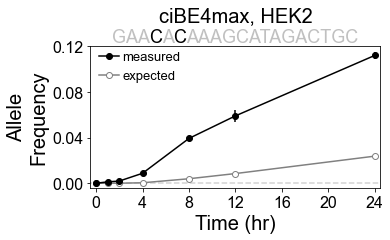

In [16]:
fig,ax = plt.subplots(figsize=(5.2,2.6))

time = [0,1,2,4,8,12,24]

ax.axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

ax.errorbar(time,df_allele1['probability'],yerr=df_allele1_err['probability'],
            fmt='-o',mfc='white',color='grey',label='calculated')
ax.errorbar(time,df_a.loc['GAATATAAAGCATAGACTGC'],yerr=df_a_err.loc['GAATATAAAGCATAGACTGC'],
            marker='o',color='black',label='measured')

ax.set_xlim([-0.5,24.5])
ax.set_xticks([0,4,8,12,16,20,24])
ax.tick_params(axis="x", labelsize=16)
ax.set_xlabel('Time (hr)', fontsize=20)

ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_ylim([-0.004,0.12])
ax.set_yticks([0,0.04,0.08,0.12])
ax.tick_params(axis="y", labelsize=16)
ax.set_ylabel('Allele\nFrequency',fontsize=20)

legend_elements = [Line2D([0],[0],marker='o',color='black',label='measured',
                          markerfacecolor='black',markersize=6,linestyle='-'),
                   Line2D([0],[0],marker='o',color='grey',label='expected',
                          markerfacecolor='white',markersize=6,linestyle='-')]
ax.legend(handles=legend_elements,bbox_to_anchor=(0.35,1.05),
          fontsize=13,frameon=False,handlelength=1.6,handletextpad=0.2)

ax.text(3, 0.12, 'GAA', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(5.1, 0.12, 'C', ha='center', va='bottom',color='black',fontsize=18)
ax.text(6.2, 0.12, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(7.2, 0.12, 'C', ha='center', va='bottom',color='black',fontsize=18)
ax.text(15.2, 0.12, 'AAAGCATAGACTGC', ha='center', va='bottom',color='silver',fontsize=18)

ax.set_title('ciBE4max, HEK2',fontsize=20,pad=25)

plt.savefig('ExportedPlots/BE4max_HEK2_allele1_20220405.svg',dpi=300,bbox_inches='tight')

# HEK3

In [17]:
df_c = pd.read_csv('Data/cumulative/BE4max_HEK3_A115.csv')
df_c = df_c / 100

df_c_sem = pd.read_csv('Data/cumulative/BE4max_HEK3_A115_sem.csv')
df_c_sem = df_c_sem / 100

In [18]:
df_allele2 = df_c[['C4','C5','C9']]
df_allele2['probability'] = df_allele2['C4'] * df_allele2['C5'] * df_allele2['C9']
df_allele2.to_csv('Data/calc_freq/BE4max_HEK3_C4_C5_C9.csv',index=False)

df_allele2_err = df_c_sem[['C4','C5','C9']]
df_allele2_err['probability'] = np.sqrt(np.square(df_allele2_err['C4']/df_allele2['C4']) +
                                        np.square(df_allele2_err['C5']/df_allele2['C5']) +
                                        np.square(df_allele2_err['C9']/df_allele2['C9'])) * df_allele2['probability']
df_allele2_err.to_csv('Data/calc_freq/BE4max_HEK3_C4_C5_C9_err.csv',index=False)

/var/folders/zt/rj0vk4w576n5lb6vjzgpk8nc0000gn/T/ipykernel_15643/2583926965.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele2['probability'] = df_allele2['C4'] * df_allele2['C5'] * df_allele2['C9']
/var/folders/zt/rj0vk4w576n5lb6vjzgpk8nc0000gn/T/ipykernel_15643/2583926965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele2_err['probability'] = np.sqrt(np.square(df_allele2_err['C4']/df_allele2['C4']) +


In [19]:
df_allele4 = df_c[['C3','C4','C5']]
df_allele4['probability'] = df_allele4['C3'] * df_allele4['C4'] * df_allele4['C5']
df_allele4.to_csv('Data/calc_freq/BE4max_HEK3_C3_C4_C5.csv',index=False)

df_allele4_err = df_c_sem[['C3','C4','C5']]
df_allele4_err['probability'] = np.sqrt(np.square(df_allele4_err['C3']/df_allele4['C3']) +
                                        np.square(df_allele4_err['C4']/df_allele4['C4']) +
                                        np.square(df_allele4_err['C5']/df_allele4['C5'])) * df_allele4['probability']
df_allele4_err.to_csv('Data/calc_freq/BE4max_HEK3_C3_C4_C5_err.csv',index=False)

/var/folders/zt/rj0vk4w576n5lb6vjzgpk8nc0000gn/T/ipykernel_15643/1126839444.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele4['probability'] = df_allele4['C3'] * df_allele4['C4'] * df_allele4['C5']
/var/folders/zt/rj0vk4w576n5lb6vjzgpk8nc0000gn/T/ipykernel_15643/1126839444.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele4_err['probability'] = np.sqrt(np.square(df_allele4_err['C3']/df_allele4['C3']) +


In [20]:
df_a = pd.read_csv('Data/allele_merged/20211109_BE4max_HEK3_A115.csv',
                   usecols=['target','24h_mean','12h_mean','8h_mean','4h_mean',
                            '2h_mean','1h_mean','0h_mean'])

df_a = df_a.set_index('target')
df_a = df_a.fillna(0)
df_a = df_a[df_a.columns[::-1]]
df_a = df_a / 100

df_a.head()

,0h_mean,1h_mean,2h_mean,4h_mean,8h_mean,12h_mean,24h_mean
target,,,,,,,
GGCCCAGACTGAGCACGTGA,0.925121,0.928171,0.924640,0.901618,0.843669,0.803371,0.666801
GGCTTAGACTGAGCACGTGA,0.002329,0.002447,0.004855,0.012111,0.044092,0.074417,0.163829
GGCCTAGACTGAGCACGTGA,0.004485,0.005300,0.007265,0.018472,0.032609,0.031679,0.045366
GGCTTAGATTGAGCACGTGA,0.000000,0.000000,0.000000,0.000000,0.002236,0.007816,0.022758
GGCCTAGATTGAGCACGTGA,0.000000,0.000000,0.000000,0.000000,0.003638,0.005335,0.009324


In [21]:
df_a_err = pd.read_csv('Data/allele_merged/20211109_BE4max_HEK3_A115.csv',
                       usecols=['target','24h_SEM','12h_SEM','8h_SEM','4h_SEM',
                                '2h_SEM','1h_SEM','0h_SEM'])

df_a_err = df_a_err.set_index('target')
df_a_err = df_a_err.fillna(0)
df_a_err = df_a_err[df_a_err.columns[::-1]]
df_a_err = df_a_err / 100

df_a_err.head()

,0h_SEM,1h_SEM,2h_SEM,4h_SEM,8h_SEM,12h_SEM,24h_SEM
target,,,,,,,
GGCCCAGACTGAGCACGTGA,0.002759,0.000214,0.004645,0.001906,0.001182,0.002801,0.004508
GGCTTAGACTGAGCACGTGA,0.000409,0.000176,0.000164,0.000464,0.001043,0.002163,0.003012
GGCCTAGACTGAGCACGTGA,0.000254,0.000474,0.000373,0.000984,0.001393,0.000764,0.001096
GGCTTAGATTGAGCACGTGA,0.000000,0.000000,0.000000,0.000000,0.000430,0.000468,0.000386
GGCCTAGATTGAGCACGTGA,0.000000,0.000000,0.000000,0.000000,0.000550,0.000218,0.000169


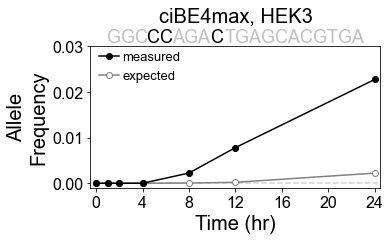

In [22]:
fig,ax = plt.subplots(figsize=(5.2,2.6))

time = [0,1,2,4,8,12,24]

ax.axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

ax.errorbar(time,df_allele2['probability'],yerr=df_allele2_err['probability'],
            fmt='-o',mfc='white',color='grey',label='calculated')
ax.errorbar(time,df_a.loc['GGCTTAGATTGAGCACGTGA'],yerr=df_a_err.loc['GGCTTAGATTGAGCACGTGA'],
            marker='o',color='black',label='measured')

ax.set_xlim([-0.5,24.5])
ax.set_xticks([0,4,8,12,16,20,24])
ax.tick_params(axis="x", labelsize=16)
ax.set_xlabel('Time (hr)', fontsize=20)

ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_ylim([-0.001,0.03])
ax.set_yticks([0,0.01,0.02,0.03])
ax.tick_params(axis="y", labelsize=16)
ax.set_ylabel('Allele\nFrequency',fontsize=20)

legend_elements = [Line2D([0],[0],marker='o',color='black',label='measured',
                          markerfacecolor='black',markersize=6,linestyle='-'),
                   Line2D([0],[0],marker='o',color='grey',label='expected',
                          markerfacecolor='white',markersize=6,linestyle='-')]
ax.legend(handles=legend_elements,bbox_to_anchor=(0.35,1.05),
          fontsize=13,frameon=False,handlelength=1.6,handletextpad=0.2)

ax.text(2.1, 0.03, 'GG', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(3.8, 0.03, 'C', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(4.9, 0.03, 'C', ha='center', va='bottom',color='black',fontsize=18)
ax.text(6, 0.03, 'C', ha='center', va='bottom',color='black',fontsize=18)
ax.text(8.2, 0.03, 'AGA', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(10.4, 0.03, 'C', ha='center', va='bottom',color='black',fontsize=18)
ax.text(17.1, 0.03, 'TGAGCACGTGA', ha='center', va='bottom',color='silver',fontsize=18)

ax.set_title('ciBE4max, HEK3',fontsize=20,pad=25)

plt.savefig('ExportedPlots/BE4max_HEK3_allele2_20220405.svg',dpi=300,bbox_inches='tight')

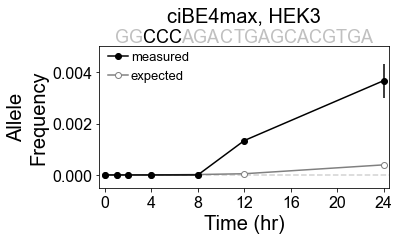

In [23]:
fig,ax = plt.subplots(figsize=(5.2,2.6))

time = [0,1,2,4,8,12,24]

ax.axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

ax.errorbar(time,df_allele4['probability'],yerr=df_allele4_err['probability'],
            fmt='-o',mfc='white',color='grey',label='calculated')
ax.errorbar(time,df_a.loc['GGTTTAGACTGAGCACGTGA'],yerr=df_a_err.loc['GGTTTAGACTGAGCACGTGA'],
            marker='o',color='black',label='measured')

ax.set_xlim([-0.5,24.5])
ax.set_xticks([0,4,8,12,16,20,24])
ax.tick_params(axis="x", labelsize=16)
ax.set_xlabel('Time (hr)', fontsize=20)

ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.set_ylim([-0.0005,0.005])
#ax.set_yticks([0,0.004,0.008,0.012])
ax.tick_params(axis="y", labelsize=16)
ax.set_ylabel('Allele\nFrequency',fontsize=20)

legend_elements = [Line2D([0],[0],marker='o',color='black',label='measured',
                          markerfacecolor='black',markersize=6,linestyle='-'),
                   Line2D([0],[0],marker='o',color='grey',label='expected',
                          markerfacecolor='white',markersize=6,linestyle='-')]
ax.legend(handles=legend_elements,bbox_to_anchor=(0.35,1.05),
          fontsize=13,frameon=False,handlelength=1.6,handletextpad=0.2)

ax.text(2.1, 0.005, 'GG', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(3.8, 0.005, 'C', ha='center', va='bottom',color='black',fontsize=18)
ax.text(4.9, 0.005, 'C', ha='center', va='bottom',color='black',fontsize=18)
ax.text(6, 0.005, 'C', ha='center', va='bottom',color='black',fontsize=18)
ax.text(8.2, 0.005, 'AGA', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(10.4, 0.005, 'C', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(17.1, 0.005, 'TGAGCACGTGA', ha='center', va='bottom',color='silver',fontsize=18)

ax.set_title('ciBE4max, HEK3',fontsize=20,pad=25)

plt.savefig('ExportedPlots/BE4max_HEK3_allele4_20220405.svg',dpi=300,bbox_inches='tight')